In [1]:
import zipfile
import os
import numpy as np

zip_path = 'Sec001_Freiwald_Tsao_faceviews_AM_data_csv.zip'
extract_path = 'freiwald_data'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Files extracted to:", extract_path)

for root, dirs, files in os.walk(extract_path):
    for file in files:
        print(os.path.join(root, file))


Files extracted to: freiwald_data
freiwald_data/Freiwald_Tsao_faceviews_AM_data_csv/raster_data_bert_am_site070.csv
freiwald_data/Freiwald_Tsao_faceviews_AM_data_csv/raster_data_lupo_am_site181.csv
freiwald_data/Freiwald_Tsao_faceviews_AM_data_csv/raster_data_bert_am_site138.csv
freiwald_data/Freiwald_Tsao_faceviews_AM_data_csv/raster_data_bert_am_site110.csv
freiwald_data/Freiwald_Tsao_faceviews_AM_data_csv/raster_data_bert_am_site105.csv
freiwald_data/Freiwald_Tsao_faceviews_AM_data_csv/raster_data_bert_am_site313.csv
freiwald_data/Freiwald_Tsao_faceviews_AM_data_csv/raster_data_lupo_am_site157.csv
freiwald_data/Freiwald_Tsao_faceviews_AM_data_csv/raster_data_bert_am_site065.csv
freiwald_data/Freiwald_Tsao_faceviews_AM_data_csv/raster_data_lupo_am_site221.csv
freiwald_data/Freiwald_Tsao_faceviews_AM_data_csv/raster_data_lupo_am_site209.csv
freiwald_data/Freiwald_Tsao_faceviews_AM_data_csv/raster_data_lupo_am_site223.csv
freiwald_data/Freiwald_Tsao_faceviews_AM_data_csv/raster_data_be

In [2]:
import os
base_path = 'freiwald_data/Freiwald_Tsao_faceviews_AM_data_csv'

# 1) List every file in that folder
print("Files in folder:\n", os.listdir(base_path))

# 2) Pick one of the raster_data_*.csv files—say site013—and show its first few lines,
#    including the header row, so we can see what columns it actually has:
import pandas as pd
df = pd.read_csv(f'{base_path}/raster_data_bert_am_site013.csv', nrows=5)
print("\nColumns in raster_data_bert_am_site013.csv:\n", df.columns.tolist())
print("\nFirst 5 rows:\n", df.head())


Files in folder:
 ['raster_data_bert_am_site070.csv', 'raster_data_lupo_am_site181.csv', 'raster_data_bert_am_site138.csv', 'raster_data_bert_am_site110.csv', 'raster_data_bert_am_site105.csv', 'raster_data_bert_am_site313.csv', 'raster_data_lupo_am_site157.csv', 'raster_data_bert_am_site065.csv', 'raster_data_lupo_am_site221.csv', 'raster_data_lupo_am_site209.csv', 'raster_data_lupo_am_site223.csv', 'raster_data_bert_am_site073.csv', 'raster_data_lupo_am_site009.csv', 'raster_data_lupo_am_site021.csv', 'raster_data_bert_am_site265.csv', 'raster_data_lupo_am_site169.csv', 'raster_data_lupo_am_site182.csv', 'raster_data_bert_am_site305.csv', 'raster_data_bert_am_site113.csv', 'raster_data_bert_am_site106.csv', 'raster_data_lupo_am_site197.csv', 'raster_data_bert_am_site258.csv', 'raster_data_lupo_am_site222.csv', 'raster_data_bert_am_site089.csv', 'raster_data_lupo_am_site030.csv', 'raster_data_lupo_am_site193.csv', 'raster_data_bert_am_site329.csv', 'raster_data_bert_am_site301.csv', '

In [3]:
import pandas as pd
import numpy as np

base = 'freiwald_data/Freiwald_Tsao_faceviews_AM_data_csv'

def load_site_raw(fname):
    df = pd.read_csv(f'{base}/{fname}')
    # X_raw: first 400 fine time‐bins
    time_cols = [c for c in df.columns if c.startswith('time.')][:400]
    X = df[time_cols].astype(int).values
    # y_front: 1 if 'front', else 0
    y = (df['labels.orientation'] == 'front').astype(int).values
    return X, y

sites = [
    'raster_data_bert_am_site013.csv',
    'raster_data_bert_am_site014.csv',
    'raster_data_lupo_am_site225.csv',
]
Xs, ys = zip(*(load_site_raw(f) for f in sites))

# Truncate all to same min_trials
min_trials = min(X.shape[0] for X in Xs)
Xs = [X[:min_trials] for X in Xs]
ys = [y[:min_trials] for y in ys]

# Stack trials
X_raw = np.vstack(Xs)    # shape = (3*min_trials, 400)
y_front = np.concatenate(ys)  # shape = (3*min_trials,)

print("X_raw shape:", X_raw.shape)    # e.g. (2052, 400)
print("y_front balance:", np.bincount(y_front))  # counts of [non-front, front]



X_raw shape: (2052, 400)
y_front balance: [1661  391]


In [7]:
from sklearn.model_selection import train_test_split

X_feat = X_raw

X_train, X_test, y_train, y_test = train_test_split(X_feat, y_front,test_size=0.2,stratify=y_front,random_state=42
)

print("Train/test sizes:", X_train.shape, X_test.shape)




Train/test sizes: (1641, 400) (411, 400)


Classification Report:
               precision    recall  f1-score   support

   non-front       0.81      1.00      0.90       333
       front       0.00      0.00      0.00        78

    accuracy                           0.81       411
   macro avg       0.41      0.50      0.45       411
weighted avg       0.66      0.81      0.73       411



/Users/tylerwolstone/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/tylerwolstone/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/tylerwolstone/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", le

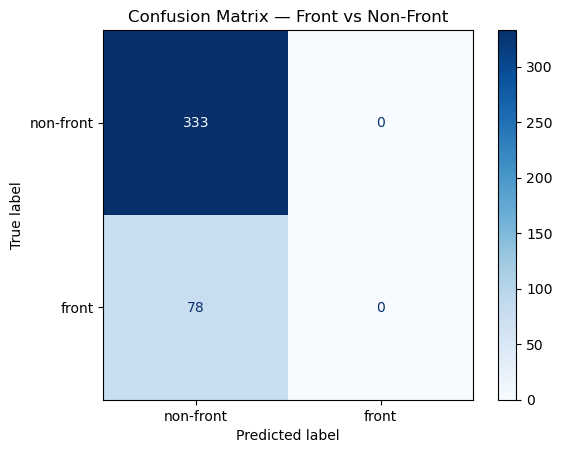

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

clf = RandomForestClassifier(n_estimators=200, max_depth=15, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=['non-front','front']))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=['non-front','front'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix — Front vs Non-Front")
plt.show()


In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

clf = RandomForestClassifier(n_estimators=300, max_depth=20, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print("Step 4 — Classification Report on Held‐Out Test Set:\n")
print(classification_report(y_test, y_pred))
from sklearn.model_selection import cross_val_score, KFold


clf = RandomForestClassifier(n_estimators=200, max_depth=15, random_state=42)

cv = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(clf, X_feat, y_front, cv=cv, scoring='accuracy', n_jobs=-1)

print("5-fold CV scores:", scores)
print("Mean CV accuracy:", scores.mean())



Step 4 — Classification Report on Held‐Out Test Set:

              precision    recall  f1-score   support

           0       0.81      1.00      0.90       333
           1       0.00      0.00      0.00        78

    accuracy                           0.81       411
   macro avg       0.41      0.50      0.45       411
weighted avg       0.66      0.81      0.73       411



/Users/tylerwolstone/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/tylerwolstone/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/tylerwolstone/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", le

5-fold CV scores: [0.81508516 0.81995134 0.80243902 0.8        0.8097561 ]
Mean CV accuracy: 0.8094463236603169
